In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow as tf


In [3]:
tumor='/content/drive/MyDrive/Brain Tumor'
healthy='/content/drive/MyDrive/Healthy'


  0%|          | 0/2513 [00:00<?, ?it/s]

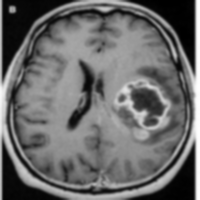

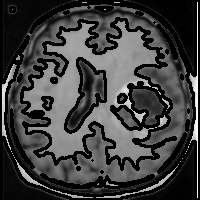

  0%|          | 1/2513 [00:00<21:30,  1.95it/s]

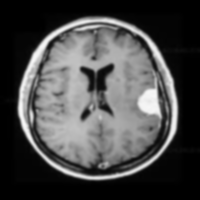

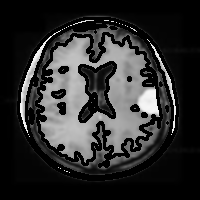

  0%|          | 2/2513 [00:00<17:27,  2.40it/s]

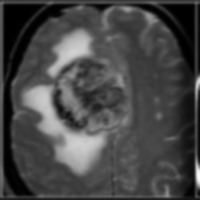

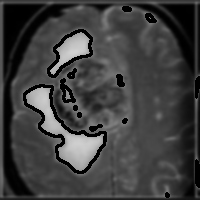

  0%|          | 2/2513 [00:01<29:43,  1.41it/s]


*********************************************************************************************************************************************


  0%|          | 0/2087 [00:00<?, ?it/s]

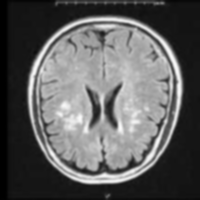

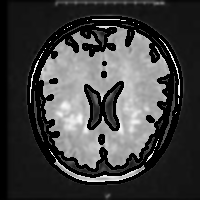

  0%|          | 1/2087 [00:00<17:13,  2.02it/s]

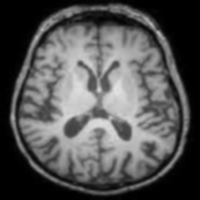

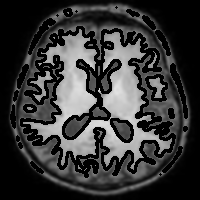

  0%|          | 2/2087 [00:00<15:56,  2.18it/s]

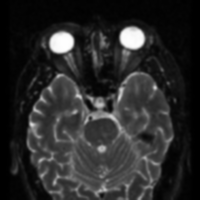

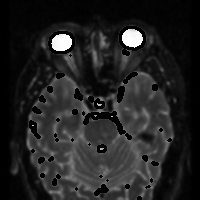

  0%|          | 2/2087 [00:01<23:11,  1.50it/s]


In [4]:
import cv2
from google.colab.patches import cv2_imshow
import os
from tqdm import tqdm
ctr=0
for img in tqdm(os.listdir(tumor)):
    image = cv2.imread(os.path.join(tumor,img),1)
    f = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    f=cv2.resize(f,(200,200))
    f=cv2.GaussianBlur(f,(5,5),0)
    cv2_imshow(f)
    _,th1=cv2.threshold(f,127,255,cv2.THRESH_TOZERO)
    #im=cv2.Canny(th1,100,200)
    #im=cv2.Laplacian(th1,cv2.CV_64F,ksize=3)
    countours,h_=cv2.findContours(th1,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(f,countours,-1,(0,0,0),2)
    cv2_imshow(f)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    ctr=ctr+1
    if ctr==3:
      break
print("*********************************************************************************************************************************************")      
ctr=0    
for img in tqdm(os.listdir(healthy)):
    f = cv2.imread(os.path.join(healthy,img))
    f = cv2.cvtColor(f,cv2.COLOR_BGR2GRAY)
    f = cv2.resize(f,(200,200))
    f=cv2.GaussianBlur(f,(5,5),0)
    cv2_imshow(f)
    _,th1=cv2.threshold(f,127,255,cv2.THRESH_TOZERO)
    #im=cv2.Canny(th1,100,200)
    #im=cv2.Laplacian(th1,cv2.CV_64F,ksize=3)
    countours,h_=cv2.findContours(th1,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(f,countours,-1,(0,0,0),2)
    cv2_imshow(f)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    ctr=ctr+1
    if ctr==3:
      break

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import os
features = []
from tqdm import tqdm
for img in tqdm(os.listdir(tumor)):
    image = cv2.imread(os.path.join(tumor,img))
    img = cv2.resize(image,(224,224))
    features.append(img)
for img in tqdm(os.listdir(healthy)):
    image = cv2.imread(os.path.join(healthy,img))
    img = cv2.resize(image,(224,224))
    features.append(img)   


100%|██████████| 2087/2087 [00:30<00:00, 68.51it/s] 


In [6]:
labels = []
from tqdm import tqdm

for img in tqdm(os.listdir(tumor)):
    labels.append(0)

for img in tqdm(os.listdir(healthy)):
    labels.append(1)

100%|██████████| 2087/2087 [00:00<00:00, 1410946.56it/s]


In [7]:
import numpy as np
X = np.array(features)
X[0].shape

(224, 224, 3)

In [8]:
Y = np.array(labels)
Y.shape

(4600,)

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8,shuffle=True)
print(xtest.shape)
print(xtrain.shape)

(920, 224, 224, 3)
(3680, 224, 224, 3)


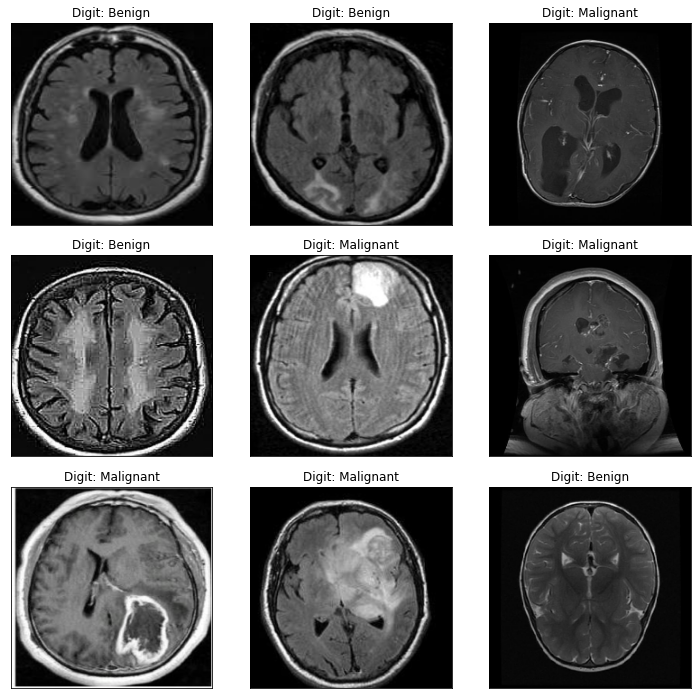

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(xtrain[i],cmap='gray')
  string="Benign" if ytrain[i] else 'Malignant'
  plt.title("Digit: {}".format(string))
  plt.xticks([])
  plt.yticks([])

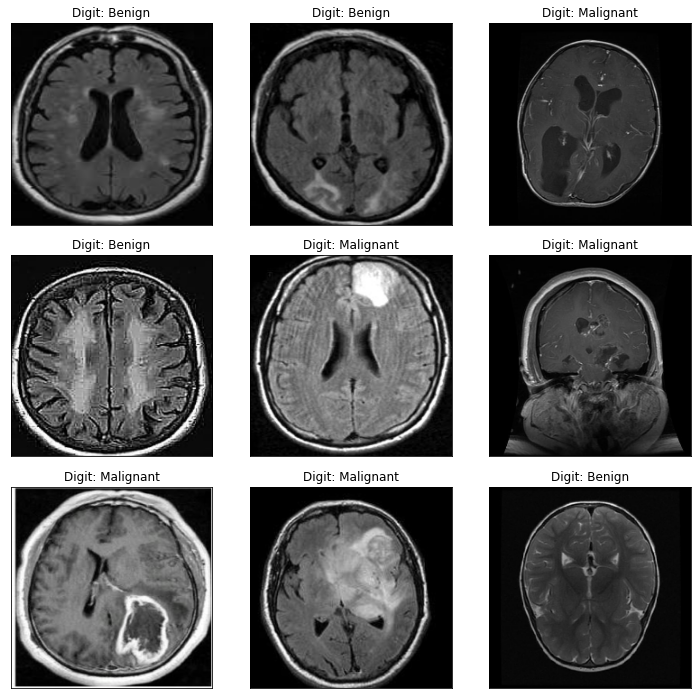

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(xtrain[i],cmap='gray')
  string="Benign" if ytrain[i] else 'Malignant'
  plt.title("Digit: {}".format(string))
  plt.xticks([])
  plt.yticks([])

In [13]:
m_model=tf.keras.applications.vgg16.VGG16()
model1=tf.keras.models.Sequential()
for layer in m_model.layers[:-1]:
  model1.add(layer)
for layer in model1.layers:
  layer.trainable=False  
model1.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid))   

553467096/553467096 [==============================] - 17s 0us/step


In [14]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history=model1.fit(xtrain,ytrain,batch_size=128,
                  verbose=1,
                  validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
29/29 [==============================] - 51s 1s/step - loss: 0.5937 - accuracy: 0.7272 - val_loss: 0.3670 - val_accuracy: 0.8424
Epoch 2/10
29/29 [==============================] - 23s 782ms/step - loss: 0.3038 - accuracy: 0.8783 - val_loss: 0.2832 - val_accuracy: 0.8870
Epoch 3/10
29/29 [==============================] - 22s 777ms/step - loss: 0.2321 - accuracy: 0.9152 - val_loss: 0.2288 - val_accuracy: 0.9207
Epoch 4/10
29/29 [==============================] - 23s 794ms/step - loss: 0.1946 - accuracy: 0.9356 - val_loss: 0.2042 - val_accuracy: 0.9304
Epoch 5/10
29/29 [==============================] - 23s 796ms/step - loss: 0.1717 - accuracy: 0.9424 - val_loss: 0.1831 - val_accuracy: 0.9315
Epoch 6/10
29/29 [==============================] - 23s 789ms/step - loss: 0.1500 - accuracy: 0.9538 - val_loss: 0.1656 - val_accuracy: 0.9380
Epoch 7/10
29/29 [==============================] - 23s 790ms/step - loss: 0.1351 - accuracy: 0.9587 - val_loss: 0.1542 - val_accuracy: 0.9478
Ep

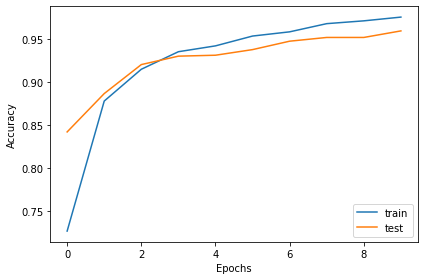

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc='lower right')
plt.tight_layout()

In [17]:
y_pred=model1.predict(xtest)

29/29 [==============================] - 7s 147ms/step


In [18]:
val_loss,acc=model1.evaluate(xtest,ytest)

29/29 [==============================] - 5s 157ms/step - loss: 0.1304 - accuracy: 0.9598
